importing Jupyter notebook from Week1_analysis.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
Youngest Age:  10.0
Oldest Age:  97.0


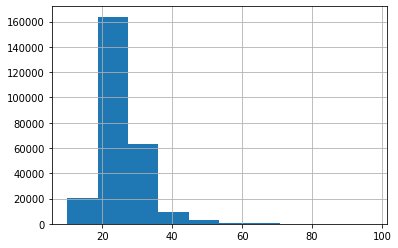

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from pandasql import sqldf
pysqldf = lambda q: sqldf(q, globals())

import import_ipynb
from Week1_analysis import summer_events, winter_events

# Summary of different descriptive statistics

One point I learned about the data is that the age for most medals earned is average 25-27 years of age.
Another point is that there are much more females than males receiving medals for the medals earned at the individual events.
Finally, the medal ratio is much higher for those in their 20's during the Summer Olympics rather than the Winter Olympics

In [3]:
#Summer Olympics:
print(pysqldf('''SELECT Sex,
                        COUNT(*),            
                        COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                 FROM summer_events
                 GROUP BY Sex'''))

  Sex  COUNT(*)      ratio
0   F     59443  26.709713
1   M    163109  73.290287


In [4]:
#Winter Olympics:
print(pysqldf('''SELECT Sex,
                    COUNT(*),            
                    COUNT(*) * 100.0 / SUM(COUNT(*)) over () AS ratio
                 FROM winter_events
                 GROUP BY Sex'''))

  Sex  COUNT(*)      ratio
0   F     15079  31.049749
1   M     33485  68.950251


In [5]:
#Summer Olympics:
print(pysqldf('''SELECT Sex,
                        AVG(Age),
                        AVG(Height),
                        AVG(Weight)
                 FROM summer_events
                 GROUP BY Sex
                 '''))

  Sex   AVG(Age)  AVG(Height)  AVG(Weight)
0   F  23.660997   168.169025    60.087644
1   M  26.443944   178.901874    75.604195


In [6]:
#Winter Olympics:
print(pysqldf('''SELECT Sex,
                        AVG(Age),
                        AVG(Height),
                        AVG(Weight)
                 
                 FROM winter_events
                 GROUP BY Sex
                 
                 '''))

  Sex   AVG(Age)  AVG(Height)  AVG(Weight)
0   F  24.014398   166.528250    59.755156
1   M  25.504261   178.668699    76.357058


In [7]:
#Summer Olympics:
summer_medals = pysqldf('''
                    SELECT
                      Age,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Age,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               summer_events
                             GROUP BY
                               Year 
                        )new_table
                       ''')

In [8]:
#Winter Olympics:
winter_medals = pysqldf('''
                    SELECT
                      Age,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio
                    FROM
                    (
                         SELECT
                             Age,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               winter_events
                             GROUP BY
                               Year 
                        )new_table
                       ''')

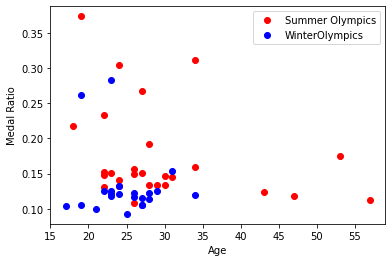

In [9]:
plt.plot(summer_medals.Age, summer_medals.medal_ratio, 'o', color = "red", label = "Summer Olympics")
plt.plot(winter_medals.Age, winter_medals.medal_ratio, 'o',color = "blue", label = "WinterOlympics")
plt.xlabel("Age")
plt.ylabel("Medal Ratio")
plt.legend()

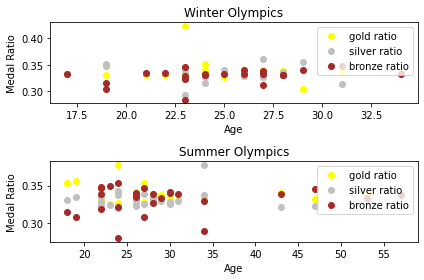

In [10]:
fig, ax = plt.subplots(2)
ax[0].plot(winter_medals.Age, winter_medals.gold_ratio, 'o', color='yellow', linewidth=4, label = "gold ratio")
ax[0].plot(winter_medals.Age, winter_medals.silver_ratio, 'o',  color='silver', linewidth=4, label = "silver ratio")
ax[0].plot(winter_medals.Age, winter_medals.bronze_ratio, 'o',  color='brown', linewidth=4, label = "bronze ratio")
ax[0].legend(loc=1)
ax[0].set_xlabel("Age")
ax[0].set_ylabel("Medal Ratio")
ax[0].set_title("Winter Olympics")
ax[1].plot(summer_medals.Age, summer_medals.gold_ratio, 'o', color='yellow', linewidth=4, label = "gold ratio")
ax[1].plot(summer_medals.Age, summer_medals.silver_ratio, 'o',  color='silver', linewidth=4, label = "silver ratio")
ax[1].plot(summer_medals.Age, summer_medals.bronze_ratio, 'o', color='brown', linewidth=4, label = "bronze ratio")
plt.legend(loc=1)
ax[1].set_xlabel("Age")
ax[1].set_ylabel("Medal Ratio")
ax[1].set_title("Summer Olympics")
plt.tight_layout()

In [11]:
m_f_ratio_summer = pysqldf('''SELECT 
                        Age,
                        CAST(SUM(CASE WHEN Sex = "F" THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = "M" THEN 1 ELSE 0 END) AS float)
                          AS Ratio
                     FROM summer_events
                     GROUP BY Age
                    ''')

m_f_ratio_winter = pysqldf('''SELECT 
                        Age,
                        CAST(SUM(CASE WHEN Sex = "F" THEN 1 ELSE 0 END) AS float) / CAST(SUM(CASE WHEN Sex = "M" THEN 1 ELSE 0 END) AS float)
                          AS Ratio
                     FROM winter_events
                     GROUP BY Age
                    ''')

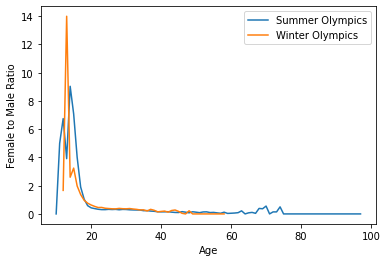

In [12]:
plt.plot(m_f_ratio_summer.Age, m_f_ratio_summer.Ratio,label="Summer Olympics")
plt.plot(m_f_ratio_winter.Age, m_f_ratio_winter.Ratio,label="Winter Olympics")
plt.xlabel("Age")
plt.ylabel("Female to Male Ratio")
plt.legend()

In [19]:
#Summer Olympics:
summer_medals_year = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio,
                      total_count
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               summer_events
                             GROUP BY
                               Year 
                        )new_table
                       ''')

In [20]:
#Winter Olympics:
winter_medals_year = pysqldf('''
                    SELECT
                      Year,
                      CAST(medal_count AS FLOAT) / total_count AS medal_ratio,
                      CAST(gold_count AS FLOAT) / medal_count AS gold_ratio,
                      CAST(silver_count AS FLOAT) / medal_count AS silver_ratio,
                      CAST(bronze_count AS FLOAT) / medal_count AS bronze_ratio,
                      total_count
                    FROM
                    (
                         SELECT
                             Year,
                             COUNT(*) AS total_count,
                             SUM(CASE
                                   WHEN Medal IS NOT NULL THEN 1 ELSE 0
                                 END) AS medal_count,
                             SUM(CASE
                                   WHEN Medal = "Gold" THEN 1 ELSE 0
                                 END) AS gold_count,
                             SUM(CASE
                                   WHEN Medal = "Silver" THEN 1 ELSE 0
                                 END) AS silver_count,
                             SUM(CASE
                                   WHEN Medal = "Bronze" THEN 1 ELSE 0
                                 END) AS bronze_count
                             FROM
                               winter_events
                             GROUP BY
                               Year 
                        )new_table
                       ''')

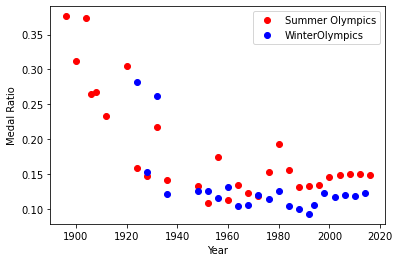

In [15]:
plt.plot(summer_medals_year.Year, summer_medals_year.medal_ratio, 'o', color = "red", label = "Summer Olympics")
plt.plot(winter_medals_year.Year, winter_medals_year.medal_ratio, 'o',color = "blue", label = "WinterOlympics")
plt.xlabel("Year")
plt.ylabel("Medal Ratio")
plt.legend()

My hypothesis has actually been proven incorrect since the female to male ratio is very high for both the summer and winter olympics. However, I was correct that the summer olympics had more medals earned overall as well as the average medals per person for the people in their 20's. For the Winter Olympics though, the people overall that earn their medals earn them from their teens to their late 20's mostly while the summer olympic medals are earned from the early 20's to the late 30's most commonly.

Some additional questions include:
 - Was the average age of females earning the gold medal lower than the men? And were they lower for the silver and bronze medal respectively as well?
 - What are some factors for the medal ratio to reduce over the decades

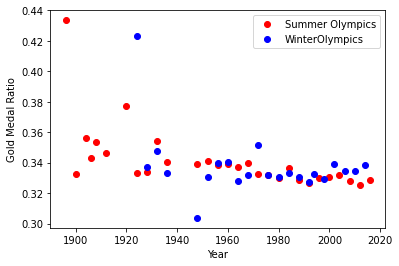

In [16]:
plt.plot(summer_medals_year.Year, summer_medals_year.gold_ratio, 'o', color = "red", label = "Summer Olympics")
plt.plot(winter_medals_year.Year, winter_medals_year.gold_ratio, 'o',color = "blue", label = "WinterOlympics")
plt.xlabel("Year")
plt.ylabel("Gold Medal Ratio")
plt.legend()

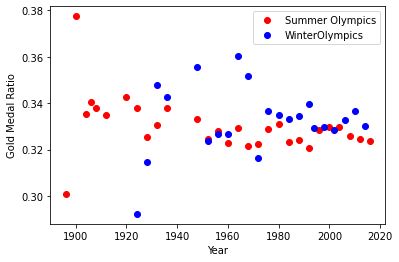

In [17]:
plt.plot(summer_medals_year.Year, summer_medals_year.silver_ratio, 'o', color = "red", label = "Summer Olympics")
plt.plot(winter_medals_year.Year, winter_medals_year.silver_ratio, 'o',color = "blue", label = "WinterOlympics")
plt.xlabel("Year")
plt.ylabel("Silver Medal Ratio")
plt.legend()

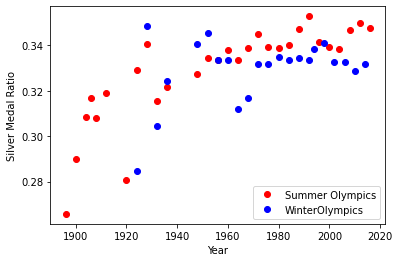

In [18]:
plt.plot(summer_medals_year.Year, summer_medals_year.bronze_ratio, 'o', color = "red", label = "Summer Olympics")
plt.plot(winter_medals_year.Year, winter_medals_year.bronze_ratio, 'o',color = "blue", label = "WinterOlympics")
plt.xlabel("Year")
plt.ylabel("Bronze Medal Ratio")
plt.legend()

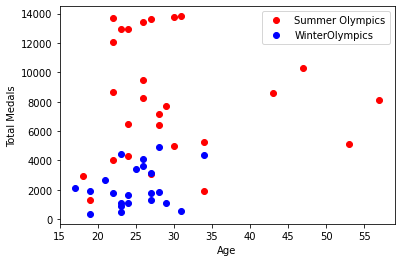

In [22]:
plt.plot(summer_medals.Age, summer_medals_year.total_count, 'o', color = "red", label = "Summer Olympics")
plt.plot(winter_medals.Age, winter_medals_year.total_count, 'o',color = "blue", label = "WinterOlympics")
plt.xlabel("Age")
plt.ylabel("Total Medals")
plt.legend()

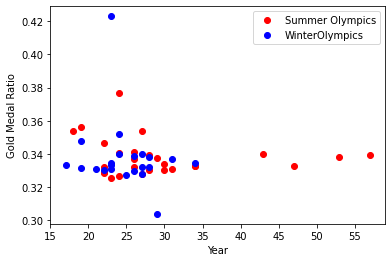

In [23]:
plt.plot(summer_medals.Age, summer_medals_year.gold_ratio, 'o', color = "red", label = "Summer Olympics")
plt.plot(winter_medals.Age, winter_medals_year.gold_ratio, 'o',color = "blue", label = "WinterOlympics")
plt.xlabel("Year")
plt.ylabel("Gold Medal Ratio")
plt.legend()

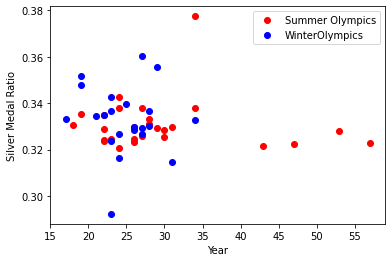

In [25]:
plt.plot(summer_medals.Age, summer_medals_year.silver_ratio, 'o', color = "red", label = "Summer Olympics")
plt.plot(winter_medals.Age, winter_medals_year.silver_ratio, 'o',color = "blue", label = "WinterOlympics")
plt.xlabel("Year")
plt.ylabel("Silver Medal Ratio")
plt.legend()

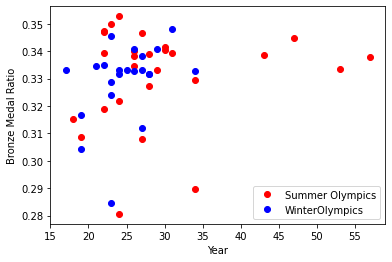

In [26]:
plt.plot(summer_medals.Age, summer_medals_year.bronze_ratio, 'o', color = "red", label = "Summer Olympics")
plt.plot(winter_medals.Age, winter_medals_year.bronze_ratio, 'o',color = "blue", label = "WinterOlympics")
plt.xlabel("Year")
plt.ylabel("Bronze Medal Ratio")
plt.legend()